<a href="https://colab.research.google.com/github/Donald-Mathew/Analytics/blob/main/PycaretModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s

In [3]:
from pycaret.clustering import *

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

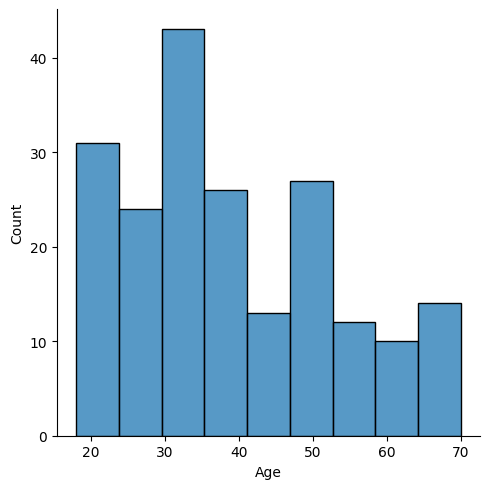

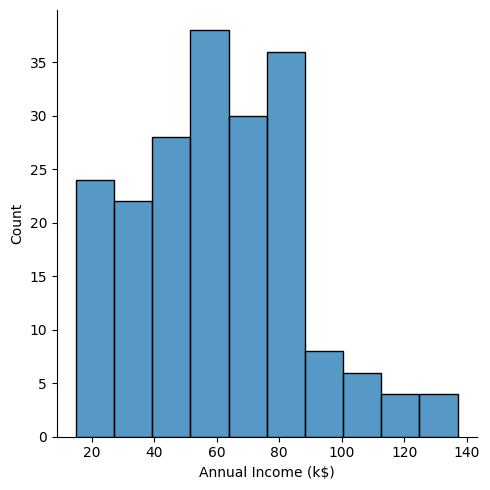

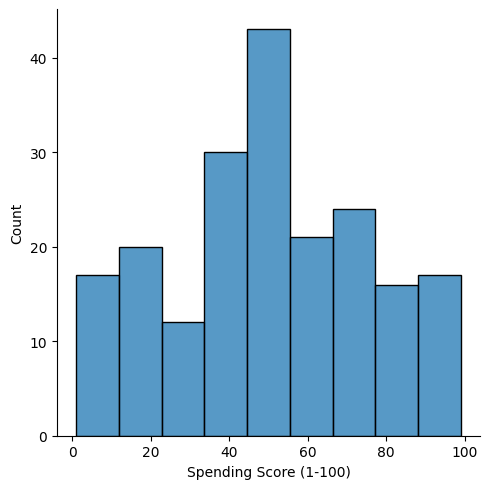

In [ ]:
import seaborn as sns
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
     sns.displot(df[i])

<Axes: xlabel='Age', ylabel='Density'>

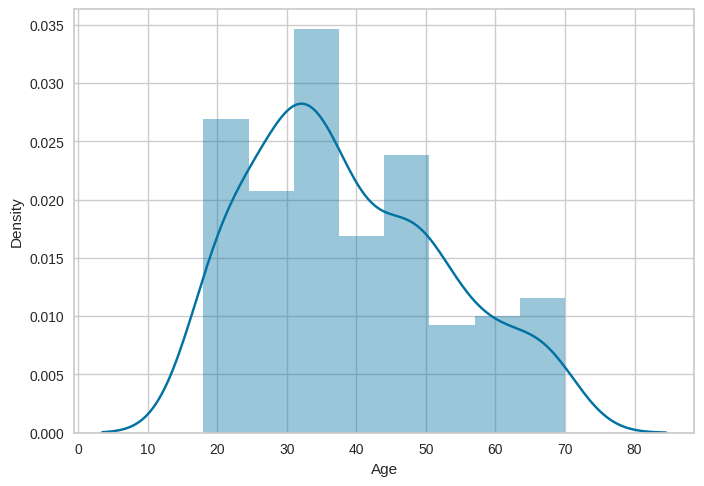

In [21]:
sns.distplot(df["Age"])

In [5]:
#scatter plot

df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

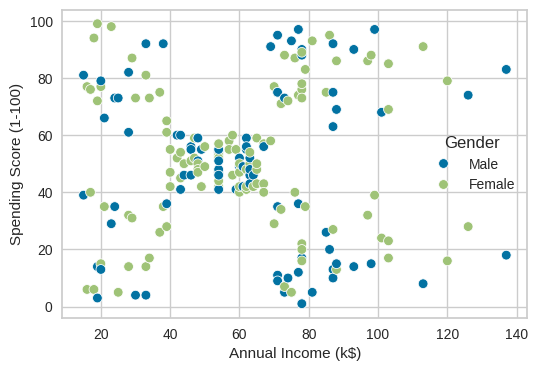

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],hue=df["Gender"]);
#the hue allows us to realize the scatterplot analysis based on an additional parameter

In [15]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

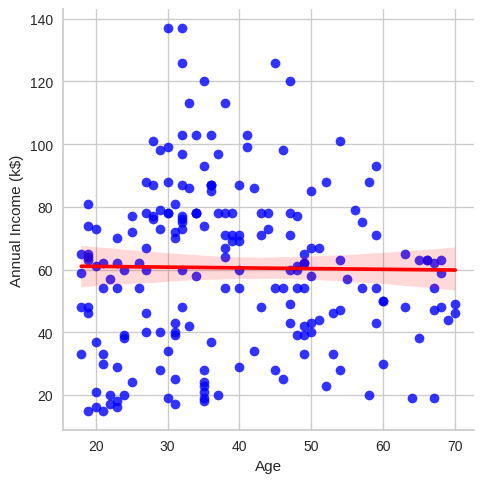

In [20]:
sns.lmplot(x="Age", y="Annual Income (k$)", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# a trend line in a scatterplot indcates that an upward direction from left to right signifies a positive
#correlation that is an increase in one variable tends to lead to an increase in the other variable
#if data points are closely positioned on the trend line it shows a strong relationship, less variability
# in data  and vice versa
# a straight line indicates linearity and extrapolation can also be attained

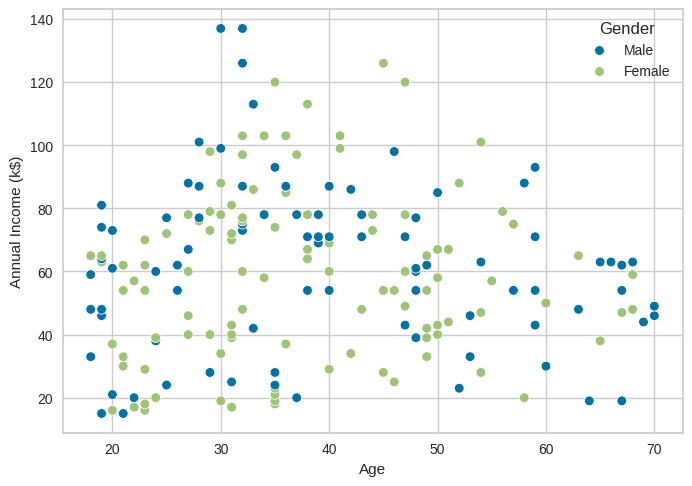

In [16]:
sns.scatterplot(x=df["Age"], y=df["Annual Income (k$)"],hue=df["Gender"]);


In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Gender'>

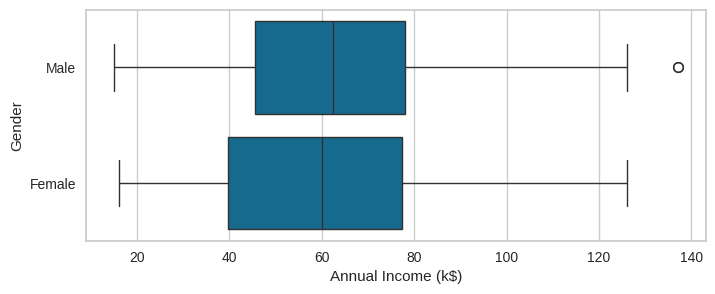

In [27]:
plt.figure(figsize=(8,3))
sns.boxplot(x = df["Annual Income (k$)"], y= df["Gender"])

#in the below case, we can conclude that the data is biasedly skewed toward the left or lower quartile
# and that a majority of the data is located in the lower values with few high values on the right
# the long whisker on the upper quartile shows a positive skewness and a high variability of data in the
#upper quartile and the short whisker on the first quartile shows that there are less data points with smaller values
#extending beyond the first qquartile

In [ ]:
#in boxplots the middle line in the box denotes the median while the lower and upper lies

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

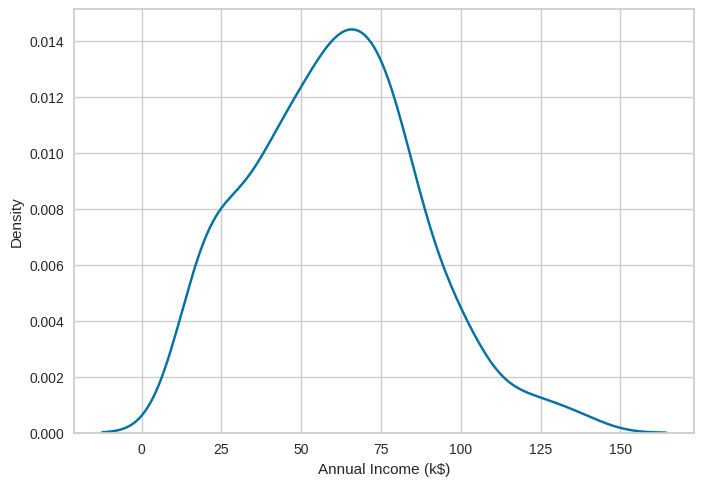

In [28]:
sns.kdeplot(df["Annual Income (k$)"])
#the annual income data kind of follows a normal distribution but is skewed to the right

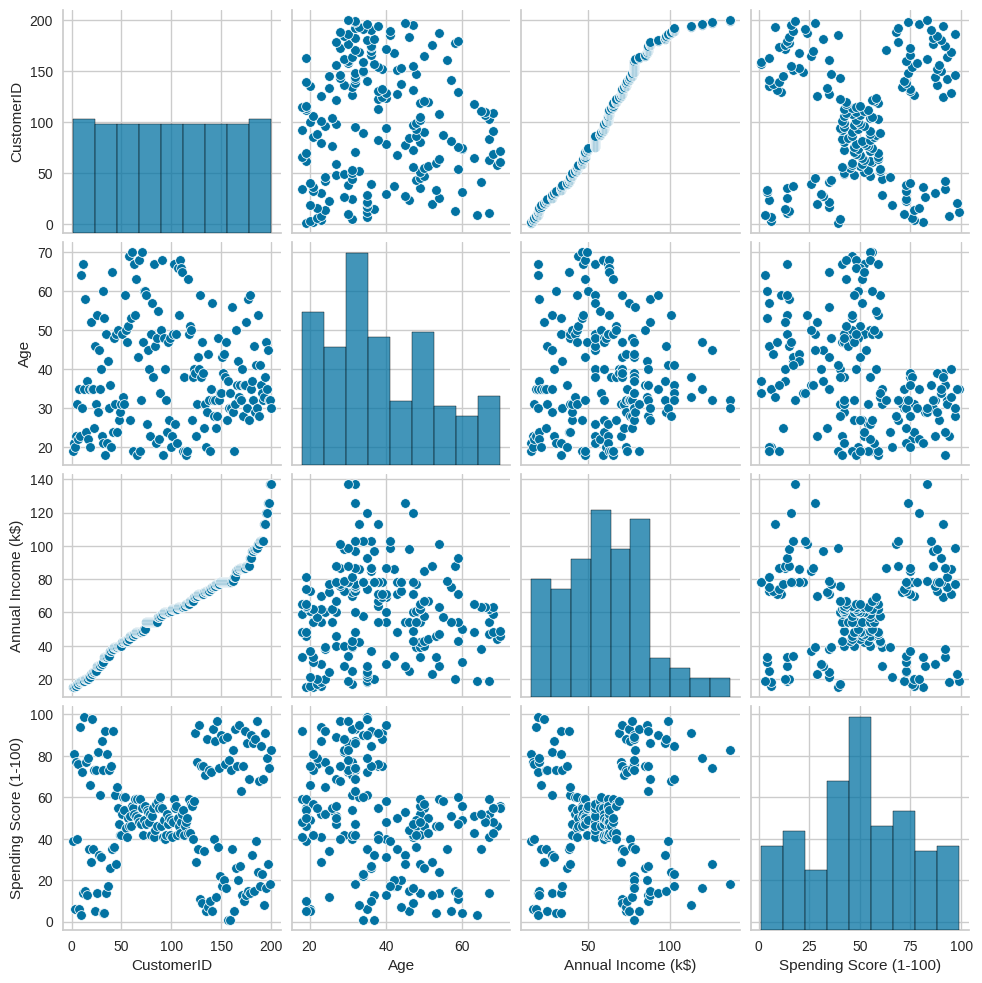

In [29]:
sns.pairplot(df)

In [31]:
#SETTING UP THE PYCARET MODEL

setup(df, normalize = True, ignore_features = "CustomerID", session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,10
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [32]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [33]:
kmeans =  create_model("kmeans")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2990,69.1093,1.2821,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [36]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
kmeans_df = assign_model(kmeans)
kmeans_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 1
1,Male,21,15,81,Cluster 1
2,Female,20,16,6,Cluster 3
3,Female,23,16,77,Cluster 0
4,Female,31,17,40,Cluster 3


In [38]:
#PLOTTING THE MODEL
plot_model(kmeans)

In [39]:
#SAVING THE MODEL
save_model(kmeans, 'trial_kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                        